# Business Understanding

Sometimes when I am planning to visit a new city I go through the Airbnb website and look at the difference between the properties and i do sort my search based on some features like the price,location and properties type, so I am excited to work on the Airbnb data of Seattle to answer these below questions were posed: 

- Is the priece ralated to the property type?
- What's the most amenities prefernce?
- Does some additions amenities make the property higher price?
- Is the price affected by seasons?

### Exploratory Data Analysis


##### Prepare Data 


To get started, let's import our libraries.

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import re
import geopandas as gpd
import contextily  as cx
import plotly.express as px

In [9]:
# read the data set
df1 = pd.read_csv(r"C:\Users\sinafisah\Desktop\project1\calendar.csv")
#df2 = pd.read_csv(r"C:\Users\sinafisah\Desktop\project1\reviews.csv") 
df2 = pd.read_csv(r"C:\Users\sinafisah\Desktop\project1\listings.csv") 

In [6]:
df1.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [10]:
df2.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


from looking at these datasets I can summurize these three datasets as belowe:

#####   - Calender (df1) 
it's contain the price based on histircal date start from Jan-2016 to Jan-2017
#####   - listing (df2) 
it's contain all the information about the properties and also it's shows the price but for just the time when the data were scrap.

checking  the number of rwos,columns and checking the missing valuse.

In [17]:
# exploring the data bychecking  the number of rwos and columns
print("shape of dataset name Calendar".center(80,"~"))
print("Rows:{}".format(df1.shape[0]))
print("Columns:{}".format(df1.shape[1]))
print("shape of dataset name listings".center(80,"~"))
print("Rows:{}".format(df2.shape[0]))
print("Columns:{}".format(df2.shape[1]))



~~~~~~~~~~~~~~~~~~~~~~~~~shape of dataset name Calendar~~~~~~~~~~~~~~~~~~~~~~~~~
Rows:1393570
Columns:4
~~~~~~~~~~~~~~~~~~~~~~~~~shape of dataset name listings~~~~~~~~~~~~~~~~~~~~~~~~~
Rows:3818
Columns:92


In [18]:
# exploring the data by checking the number Na values 
def na1(df):
    na_columns1 = [col for col in df.columns if df[col].isnull().sum() > 0]
    count_Na1 = df[na_columns1].isnull().sum()
    return count_Na1
    
print("Columns with Na of dataset name Calendar".center(80,"~"))
print(na1(df1))
print("Columns with Na of dataset name listing".center(80,"~"))
print(na1(df2))


~~~~~~~~~~~~~~~~~~~~Columns with Na of dataset name Calendar~~~~~~~~~~~~~~~~~~~~
price    459028
dtype: int64
~~~~~~~~~~~~~~~~~~~~Columns with Na of dataset name listing~~~~~~~~~~~~~~~~~~~~~
summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_ver

as we can see there is alot of missing values in the price coulmn at Calender datasets, I will drop these rows cause the price is my main varible in this datasets and if it Na i couldn't use it. Alos I will creat a new dataset with just the coulmns that I'll use in my analysis.


In [32]:
# creating a copy for my data sets
df1_2 = df1.copy()
df2_2 = df2.copy()

In [14]:
# proportion of price non null
proportion_of_price_CalenderDatast = df1_2.price.count()/df1_2.shape[0]
print("  proportion of price non null  ".center(80,"~"))
print(proportion_of_price_CalenderDatast)

~~~~~~~~~~~~~~~~~~~~~~~~  proportion of price non null  ~~~~~~~~~~~~~~~~~~~~~~~~
0.6706100160020666


If I remove the Na values in price columns at Calender dataset it's will leave me with 68% of the entire data and I am comfortable with this action.

In [33]:
#droping the Na values and the columns that i do not need
df1_2 = df1_2.dropna(how='any',subset=['price'])
df2_2 = df2_2.drop(['listing_url', 'scrape_id', 'last_scraped', 'name','thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name','host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count','requires_license'
       ,'license','jurisdiction_names','calculated_host_listings_count','reviews_per_month','notes', 'transit', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified','neighbourhood_cleansed', 'neighbourhood_group_cleansed','review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy','first_review', 'last_review','require_guest_profile_picture',
       'require_guest_phone_verification'],axis=1)

In [34]:
df2_2.columns

Index(['id', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'street', 'neighbourhood', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'review_scores_rating'],
      dtype='object')

In [35]:
# exploring the data by checking count of Unique values 
def uniqe1(df):
    u = pd.DataFrame({"Varaible" : df.columns , "Count Of Unique Values" : [df[i].nunique() for i in df.columns]})
    u = u.sort_values('Count Of Unique Values',ascending=False)
    return u
print("Number of Uniqe values of dataset name Calendar".center(80,"~"))
print(uniqe1(df1_2))
print("Number of Uniqe values of dataset name listing".center(80,"~"))
print(uniqe1(df2_2))


~~~~~~~~~~~~~~~~Number of Uniqe values of dataset name Calendar~~~~~~~~~~~~~~~~~
     Varaible  Count Of Unique Values
0  listing_id                    3723
3       price                     669
1        date                     365
2   available                       1
~~~~~~~~~~~~~~~~~Number of Uniqe values of dataset name listing~~~~~~~~~~~~~~~~~
                 Varaible  Count Of Unique Values
0                      id                    3818
16              longitude                    3818
15               latitude                    3818
3             description                    3742
1                 summary                    3478
25              amenities                    3284
2                   space                    3119
5   neighborhood_overview                    2506
6                  street                    1442
28           weekly_price                     395
41       availability_365                     363
29          monthly_price                     35

After exploring the Calendes dataset it shows the price and date , Also it's has a listing_id so I can merge the dataset with the listinge dataset so I can see if there is a corrlation between the price and the proporety typy.

### ______________________________ QUEASTION1________________________________________ 
 * is the priece ralated to the appartment type?

In [19]:
# First let's see the count of property for every property type
count_of_property_for_each_type = df2_2.property_type.value_counts()
count_of_property_for_each_type

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [45]:
# changing the datatypes of the id columns
df1_2['listing_id'] = df1_2['listing_id'].astype(str)
df2_2['id'] = df2_2['id'].astype(str)

In [ ]:
# changing the datatypes of the price columns
# also i need to remove the dollar sign and comma 
df1_2['price'] = df1_2['price'].str.replace('$', '')
df1_2['price'] = df1_2['price'].str.replace(',', '')
df1_2['price'] = df1_2['price'].astype(float)
df2_2['price'] = df2_2['price'].str.replace('$', '')
df2_2['price'] = df2_2['price'].str.replace(',', '')
df2_2['price'] = df2_2['price'].astype(float)
df1_2['listing_id'] = df1_2['listing_id'].astype(str)
df2_2['id'] = df2_2['id'].astype(str)

I need to merge the listing and the Calender datasets i'll marge just the coulmn that I need from listing, I will use calender as left merge.  

At first I need to rename the 'listing_id' from calender to 'id'

In [62]:
df1_2.rename(columns={'listing_id': "id"}, inplace=True)
m1 = pd.merge(df1_2,df2_2[['id','property_type','amenities']],how="left",on='id')

In [63]:
#cheching the number of Rows for the new datasets
print(q1.shape)
print(df1_2.shape)

(934542, 5)
(934542, 4)


As we see the dataset that I just creat by merging the calender and listing has the same row count of calender data set, that mean the merge is correct.

In [53]:
# grouping the property types with avreage price
property_type_mean = q1.groupby('property_type')['price'].mean()
property_type_average_price = pd.DataFrame(property_type_mean)
property_type_average_price.reset_index(inplace=True)
property_type_average_price

,property_type,price
0,Apartment,139.285106
1,Bed & Breakfast,116.048976
2,Boat,330.618901
3,Bungalow,124.330813
4,Cabin,114.292208
5,Camper/RV,126.931055
6,Chalet,93.509009
7,Condominium,169.646416
8,Dorm,39.384977
9,House,136.627935


c:\Users\sinafisah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_type', ylabel='price'>

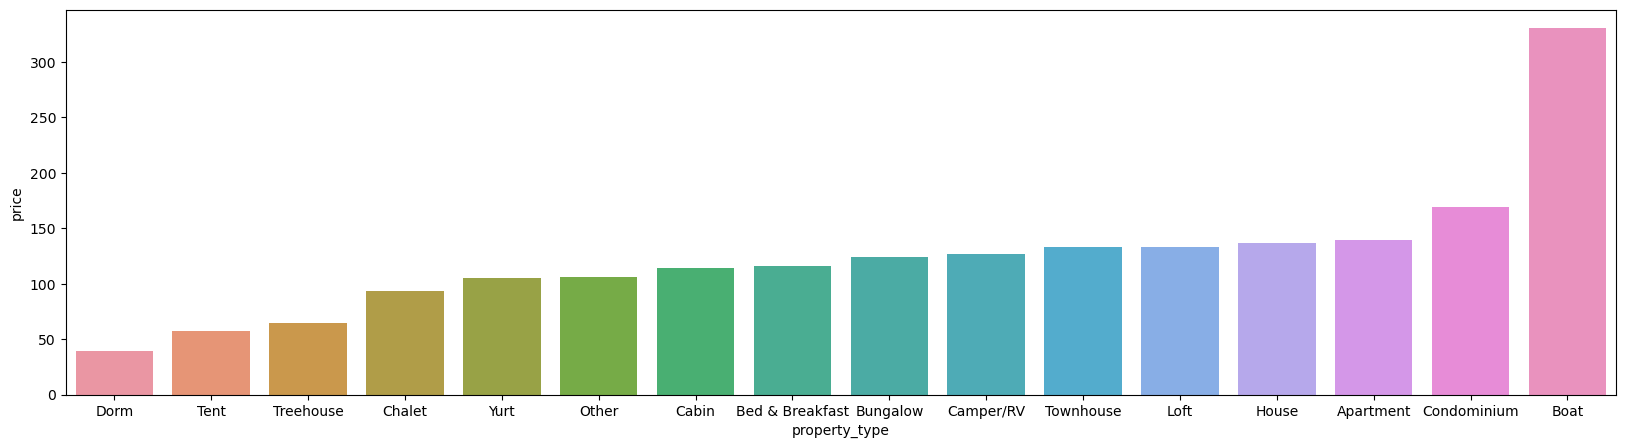

In [52]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot('property_type','price',data=property_type_average_price,order=property_type_average_price.sort_values('price').property_type)

As we see from the bar chart above the Boat has haigher price with 331 dollar as average price.
then the Condominium with 139 dollar as average price.

 ______________________________ QUEASTION2________________________________________

what's the most amenities prefernce?


to answer this quastion I need to check the amenities and the rete coulmns of each proporety.
at first let's examin the amenities coulmn.

In [56]:
amenities_words_counts = df2['amenities'].apply(lambda x: len(x.split()))
amenities_words_counts.describe()

count    3818.000000
mean       11.509167
std         4.572307
min         1.000000
25%         8.000000
50%        11.000000
75%        15.000000
max        29.000000
Name: amenities, dtype: float64

As we can see there is 11 amenitie as average for every row

In [60]:
amenities_words = df2_2['amenities'].apply(lambda x:" ".join(word.lower() for word in x.split()))
amenities_words=amenities_words.str.replace('[{}\,\"]'," ")
pd.Series(" ".join(amenities_words).split()).value_counts()[:60]

C:\Users\sinafisah\AppData\Local\Temp\ipykernel_15516\296531517.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_words=amenities_words.str.replace('[{}\,\"]'," ")


internet           6478
detector           5766
tv                 4020
dryer              3773
wireless           3667
heating            3627
kitchen            3423
smoke              3281
essentials         3237
on                 3150
washer             2994
friendly           2708
shampoo            2670
monoxide           2485
carbon             2485
extinguisher       2196
fire               2196
free               2167
parking            2167
premises           2167
family/kid         1963
first              1680
aid                1680
kit                1680
cable              1446
pets               1355
fireplace           886
indoor              886
this                883
live                883
property            883
hangers             846
building            785
in                  785
elevator            785
hair                774
workspace           745
laptop              745
iron                742
safety              727
card                727
conditioning    

Now I will check the rete of properties the who have the most words repeted.

Also I use the seem data set that i create but I will add a amenities column from the listing.

In [67]:
most_amenities_repeted = ['tv','detector','internet','kitchen','parking','heating','dryer']

In [66]:
def listing_splitter(text, listing):
    # Try except to handle np.nans in input
    try:
        # Extract the list of flags
        flags = [l for l in listing if l in text.lower()]
        # If any flags were extracted then return the list
        if flags:
            return 'inclode'
        # Otherwise return np.nan
        else:
            return 'not_inclode'
    except AttributeError:
        return np.nan

In [68]:
m1['most_amenities_repeted'] = m1['amenities'].apply(lambda x: listing_splitter(x,most_amenities_repeted))

In [69]:
m1.head(10)

,id,date,available,price,property_type,amenities,most_amenities_repeted
0,241032,2016-01-04,t,85.0,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",inclode
1,241032,2016-01-05,t,85.0,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",inclode
2,241032,2016-01-13,t,85.0,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",inclode
3,241032,2016-01-14,t,85.0,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",inclode
4,241032,2016-01-18,t,85.0,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",inclode
5,241032,2016-01-19,t,85.0,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",inclode
6,241032,2016-01-20,t,85.0,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",inclode
7,241032,2016-01-24,t,85.0,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",inclode
8,241032,2016-01-25,t,85.0,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",inclode
9,241032,2016-01-26,t,85.0,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",inclode


Now I have coulumns deterimn if the property have there amenities or not

<AxesSubplot:xlabel='most_amenities_repeted'>

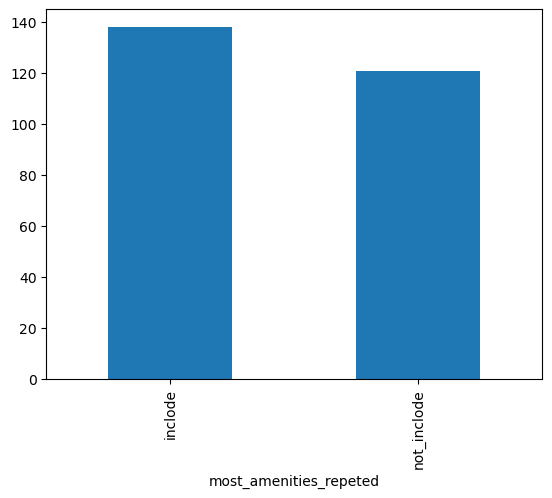

In [70]:
m1.groupby('most_amenities_repeted')['price'].mean().plot(kind='bar')

------------------- Quastion 3 -----------------------

- Is the price affected by seasons?

At first I need to crete new column that combine the moth and the year

In [73]:
m1['month_year'] = pd.to_datetime(m1['date']).dt.to_period('M')

<AxesSubplot:xlabel='month_year'>

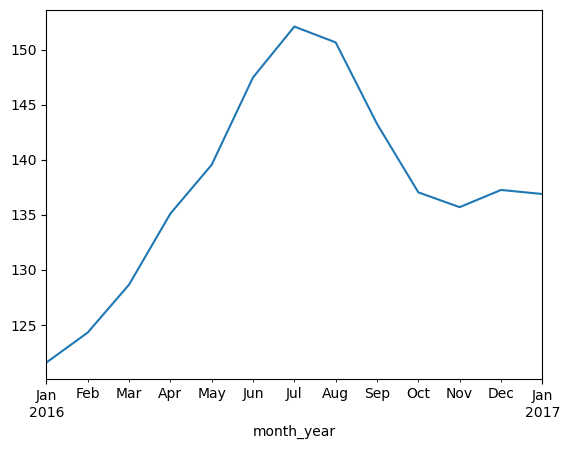

In [76]:
m1.groupby('month_year')['price'].mean().plot(kind='line', rot=0,)

The answer for the Quastion is yes it's effected we can tell from the line chart above that's ths most highest May - Oct